In [15]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import requests 
from config import api_key
from pytrends.request import TrendReq




pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(["bitcoin", "cryptocurrency", "Ethereum", "BTC", "ETH"], cat=0,  geo='', timeframe="today 5-y", gprop='')
# "XRP", "BCH", "ETH",
df = pytrends.interest_over_time()

df.to_csv('...\Cryptocurrency_analysis_project\Google_search.csv')
df.head()

,bitcoin,cryptocurrency,Ethereum,BTC,ETH,isPartial
date,,,,,,
2014-03-30,3,0,0,1,0,False
2014-04-06,3,0,0,1,0,False
2014-04-13,3,0,0,1,0,False
2014-04-20,3,0,0,1,0,False
2014-04-27,3,0,0,1,0,False


In [17]:

df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/ Cryptocurrency  project /Cryptocurrency_analysis_project/Google_search.csv')

In [22]:
file = "../Cryptocurrency_analysis_project/Google_search.csv"
df = pd.read_csv(file)
df.head()

,date,bitcoin,cryptocurrency,Ethereum,BTC,ETH
0,1/3/16,3,0,0,1,0
1,1/10/16,3,0,0,1,0
2,1/17/16,3,0,0,1,0
3,1/24/16,2,0,0,1,0
4,1/31/16,2,0,0,1,0


<IPython.core.display.Javascript object>


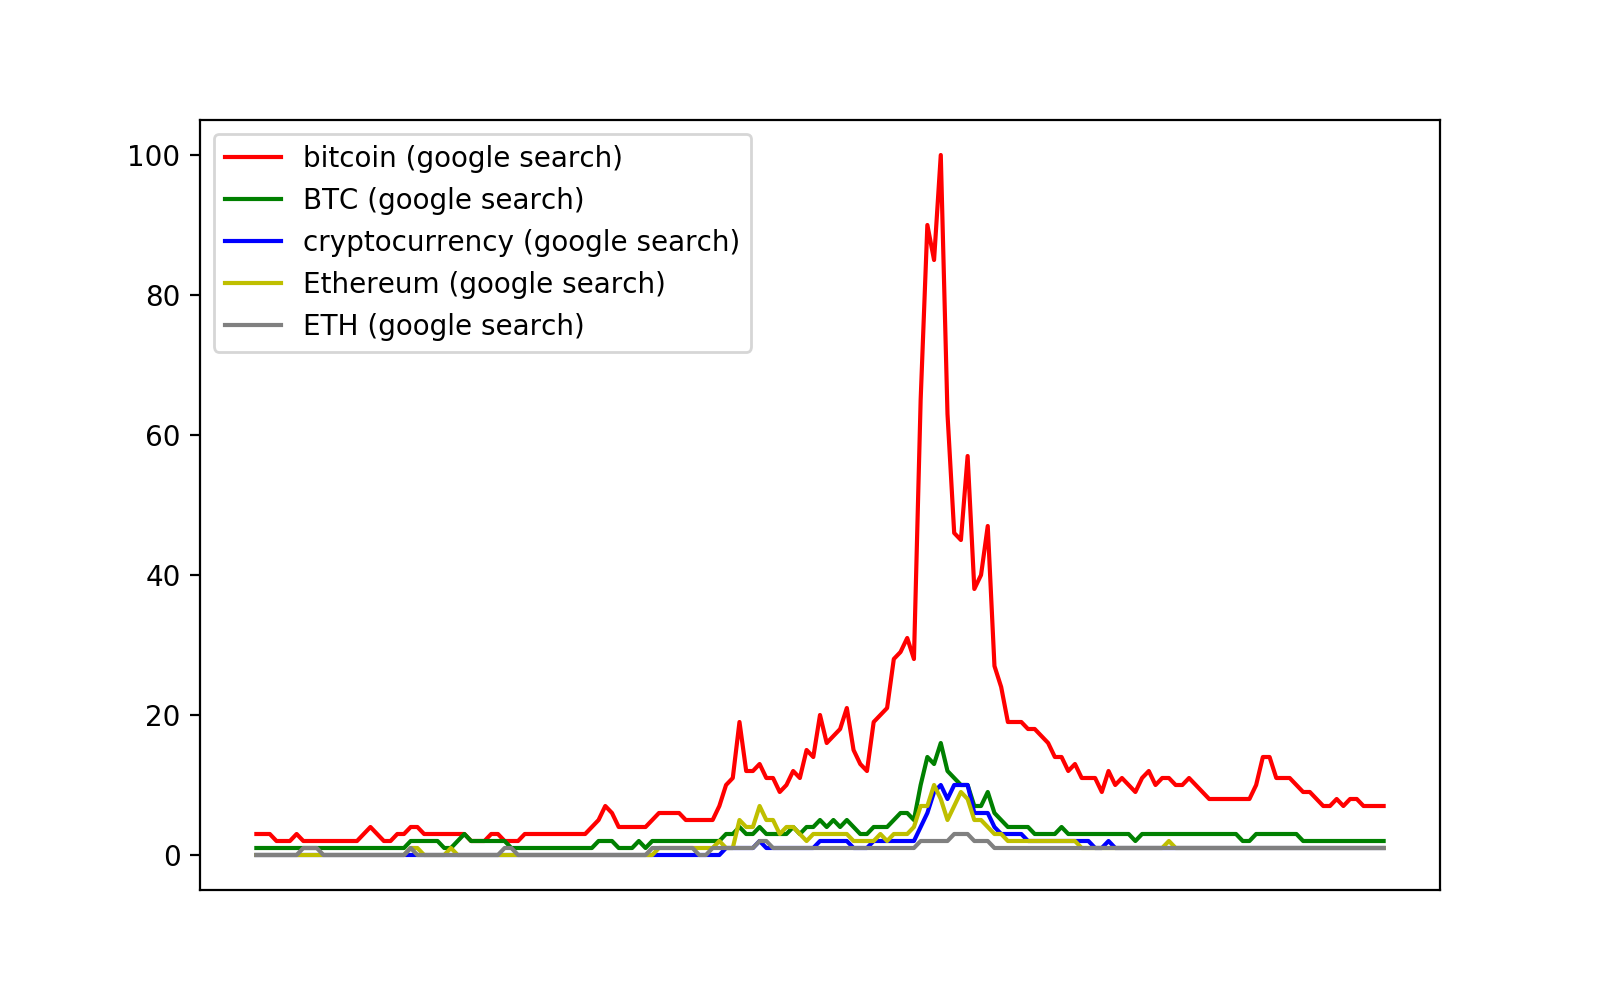

In [34]:
import datetime
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,2) for j in range(2018,2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%m %d %Y') 
                     for i in range(1,13,2) for j in range(2018,2019)])
ax1.plot(df['date'].astype(datetime.datetime),
             df['bitcoin'], label='bitcoin (google search)', color='r')
ax1.plot(df['date'].astype(datetime.datetime),
             df['BTC'], label="BTC (google search)", color='g')
ax1.plot(df['date'].astype(datetime.datetime),
             df['cryptocurrency'], label="cryptocurrency (google search)", color='b')
ax1.plot(df['date'].astype(datetime.datetime),
             df['Ethereum'], label="Ethereum (google search)", color='y')
ax1.plot(df['date'].astype(datetime.datetime),
             df['ETH'], label="ETH (google search)", color='grey')
ax1.legend(loc = "best")
plt.show()